Epoch 1/50 | D Loss: 0.6846 | G Loss: 3.8153
Epoch 2/50 | D Loss: 0.8441 | G Loss: 5.2095
Epoch 3/50 | D Loss: 0.4407 | G Loss: 3.5687
Epoch 4/50 | D Loss: 0.4162 | G Loss: 2.9775
Epoch 5/50 | D Loss: 0.8547 | G Loss: 1.8911
Epoch 6/50 | D Loss: 1.3588 | G Loss: 0.9003
Epoch 7/50 | D Loss: 1.3015 | G Loss: 0.9167
Epoch 8/50 | D Loss: 1.3855 | G Loss: 0.9315
Epoch 9/50 | D Loss: 1.3013 | G Loss: 0.9696
Epoch 10/50 | D Loss: 1.2560 | G Loss: 0.9851


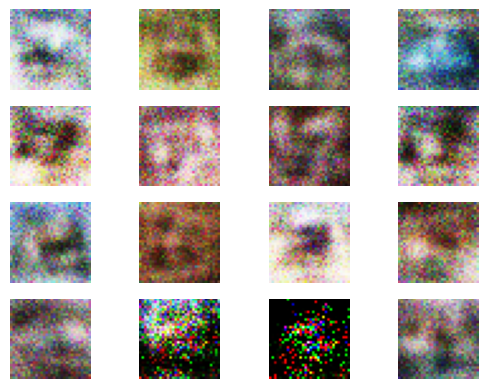

Epoch 11/50 | D Loss: 1.4276 | G Loss: 0.9728
Epoch 12/50 | D Loss: 1.1738 | G Loss: 0.8351
Epoch 13/50 | D Loss: 1.5763 | G Loss: 0.6797
Epoch 14/50 | D Loss: 1.2261 | G Loss: 0.9026
Epoch 15/50 | D Loss: 2.0099 | G Loss: 0.7879
Epoch 16/50 | D Loss: 1.2982 | G Loss: 0.9834
Epoch 17/50 | D Loss: 1.1668 | G Loss: 0.9450
Epoch 18/50 | D Loss: 0.9763 | G Loss: 0.7796
Epoch 19/50 | D Loss: 1.0819 | G Loss: 0.8127
Epoch 20/50 | D Loss: 1.0364 | G Loss: 0.8738


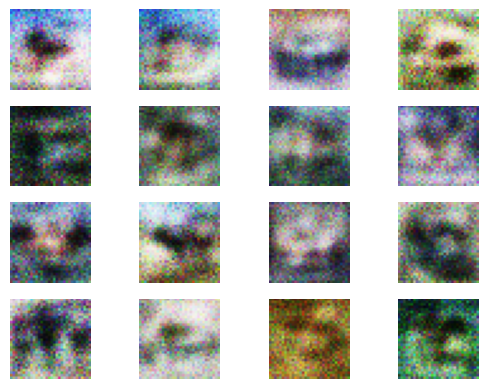

Epoch 21/50 | D Loss: 1.4354 | G Loss: 0.7106
Epoch 22/50 | D Loss: 1.2951 | G Loss: 0.9107
Epoch 23/50 | D Loss: 1.1034 | G Loss: 1.0298
Epoch 24/50 | D Loss: 1.1140 | G Loss: 0.9190
Epoch 25/50 | D Loss: 1.2354 | G Loss: 0.6849
Epoch 26/50 | D Loss: 1.2067 | G Loss: 0.7969
Epoch 27/50 | D Loss: 1.9215 | G Loss: 1.5260
Epoch 28/50 | D Loss: 1.2654 | G Loss: 1.0413
Epoch 29/50 | D Loss: 1.1275 | G Loss: 0.9837
Epoch 30/50 | D Loss: 1.1632 | G Loss: 1.1108


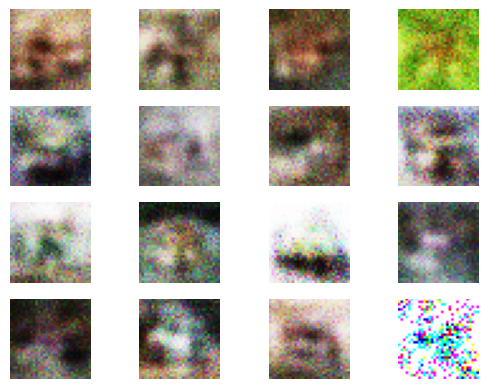

Epoch 31/50 | D Loss: 1.0920 | G Loss: 0.7404
Epoch 32/50 | D Loss: 1.2477 | G Loss: 1.1139
Epoch 33/50 | D Loss: 1.1588 | G Loss: 0.7644
Epoch 34/50 | D Loss: 1.2966 | G Loss: 1.0020
Epoch 35/50 | D Loss: 1.2839 | G Loss: 1.0507
Epoch 36/50 | D Loss: 1.1894 | G Loss: 0.7722
Epoch 37/50 | D Loss: 1.1656 | G Loss: 0.8037
Epoch 38/50 | D Loss: 1.2554 | G Loss: 0.7104
Epoch 39/50 | D Loss: 1.3208 | G Loss: 0.8399
Epoch 40/50 | D Loss: 1.3253 | G Loss: 0.8179


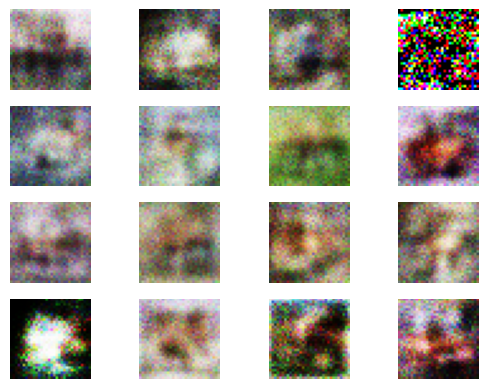

Epoch 41/50 | D Loss: 1.1765 | G Loss: 0.8538
Epoch 42/50 | D Loss: 1.2840 | G Loss: 0.7555
Epoch 43/50 | D Loss: 1.2055 | G Loss: 0.7713
Epoch 44/50 | D Loss: 1.5011 | G Loss: 0.7735
Epoch 45/50 | D Loss: 1.3981 | G Loss: 0.7132
Epoch 46/50 | D Loss: 1.3049 | G Loss: 0.7573
Epoch 47/50 | D Loss: 1.3737 | G Loss: 0.7800
Epoch 48/50 | D Loss: 1.3114 | G Loss: 0.6664
Epoch 49/50 | D Loss: 1.4354 | G Loss: 0.7578
Epoch 50/50 | D Loss: 1.4053 | G Loss: 0.7476


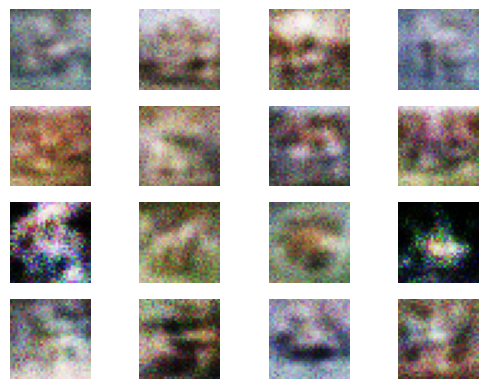

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Hyperparameters
latent_dim = 100
batch_size = 64
epochs = 50
image_shape = (32, 32, 3)

# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(50000).batch(batch_size)

# Generator
def build_generator():
    model = models.Sequential([
        layers.Dense(256, activation="relu", input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(1024, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(np.prod(image_shape), activation="tanh"),
        layers.Reshape(image_shape)
    ])
    return model

# Discriminator
def build_discriminator():
    model = models.Sequential([
        layers.Flatten(input_shape=image_shape),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Instantiate models
generator = build_generator()
discriminator = build_discriminator()

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
d_optimizer = tf.keras.optimizers.Adam(0.0002)
g_optimizer = tf.keras.optimizers.Adam(0.0002)

# Training step
def train_step(real_images):
    batch_size = real_images.shape[0]

    # Train Discriminator
    z = tf.random.normal([batch_size, latent_dim])
    fake_images = generator(z, training=True)

    real_labels = tf.ones((batch_size, 1))
    fake_labels = tf.zeros((batch_size, 1))

    with tf.GradientTape() as d_tape:
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)
        d_loss_real = cross_entropy(real_labels, real_output)
        d_loss_fake = cross_entropy(fake_labels, fake_output)
        d_loss = d_loss_real + d_loss_fake

    d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

    # Train Generator
    z = tf.random.normal([batch_size, latent_dim])
    valid_labels = tf.ones((batch_size, 1))

    with tf.GradientTape() as g_tape:
        generated_images = generator(z, training=True)
        fake_output = discriminator(generated_images, training=True)
        g_loss = cross_entropy(valid_labels, fake_output)

    g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
    g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))

    return d_loss, g_loss

# Training loop
for epoch in range(epochs):
    for real_images in dataset:
        d_loss, g_loss = train_step(real_images)

    # Print progress
    print(f"Epoch {epoch + 1}/{epochs} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

    # Generate and display images
    if (epoch + 1) % 10 == 0:
        z = tf.random.normal([16, latent_dim])
        gen_images = generator(z, training=False)
        gen_images = 0.5 * gen_images + 0.5
        for i in range(16):
            plt.subplot(4, 4, i + 1)
            plt.imshow(gen_images[i])
            plt.axis("off")
        plt.show()
